In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
label = pd.read_csv('../files/labels.csv')
sent = pd.read_csv('../files/4mula_sent.csv')

In [3]:
label['sentiment'] = sent.iloc[:,2]

In [4]:
sent_count = {k: v for (k, v) in zip(set(label.iloc[:1000,2]),np.full(17,0))}
sent_sum = {k: v for (k, v) in zip(set(label.iloc[:1000,2]),np.full(17,0,dtype=np.float64))}

In [5]:
for i, el in label[:1000].iterrows():
    sent_count[el['label']] =  sent_count[el['label']] + 1
    sent_sum[el['label']] = sent_sum[el['label']] + el['sentiment']

In [6]:
labels = list(sent_count.keys())
label_count = list(sent_count.values())
label_sum = list(sent_sum.values())

In [7]:
medias = []
for s,c in zip(label_sum, label_count):
    medias.append(s/c)

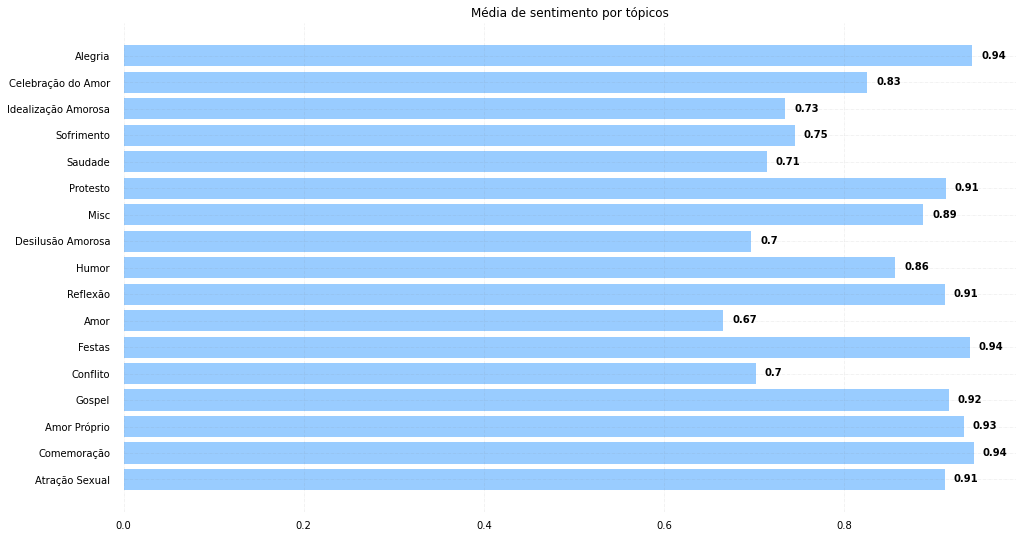

In [8]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(labels, medias,color='#99CCFF')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold')

# Add Plot Title
ax.set_title('Média de sentimento por tópicos',
             loc ='center' )
 
# Show Plot
plt.savefig('media.png')
plt.show()